# Day 2 – Python Data Exploration
---

## Objective

Analyze the NYC High School Directory dataset using Python, Jupyter Notebook, Pandas and Matplotlib to gain insights into the distribution, characteristics, and scale of high schools across New York City boroughs. The analysis focuses on cleaning and standardizing column names, validating unique school identifiers (dbn), examining grade span offerings, and comparing borough-level metrics such as the number of schools and average student enrollment. Visualizations are used to highlight differences between boroughs, and findings are summarized to support data-driven observations about school coverage and structure within the NYC public high school system.

## Import Library and Data

In [1]:
import pandas as pd #data analysis and manipulation
import matplotlib.pyplot as plt #visualization

In [80]:
#read a local .csv file into a pandas dataframe

df = pd.read_csv("/Users/michael/Desktop/webeet.io/Onboarding/Day2/high-school-directory.csv") 

---
## EDA - First Impression 

### First 5 and last 5 rows

In [ ]:
pd.concat([df.head(), df.tail()]) #shows first and last five rows using default settings

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,council_district,census_tract,bin,bbl,nta,zip_codes,community_districts,borough_boundaries,city_council_districts,police_precincts
0,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,NaN,NaN,...,31.0,100802.0,4300730.0,4.157360e+09,Far Rockaway-Bayswater ...,20529.0,51,3,47,59
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...,17616.0,21,2,45,35
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,36.0,291.0,3393805.0,3.016160e+09,Stuyvesant Heights ...,18181.0,69,2,49,52
3,08X305,Pablo Neruda Academy,Bronx,X450,718-824-1682,718-824-1663,9.0,12,NaN,NaN,...,18.0,16.0,2022205.0,2.036040e+09,Soundview-Castle Hill-Clason Point-Harding Par...,11611.0,58,5,31,26
4,03M485,Fiorello H. LaGuardia High School of Music & A...,Manhattan,M485,212-496-0700,212-724-5748,9.0,12,NaN,NaN,...,6.0,151.0,1030341.0,1.011560e+09,Lincoln Square ...,12420.0,20,4,19,12
430,02M300,Urban Assembly School of Design and Constructi...,Manhattan,M535,212-586-0981,212-586-1731,9.0,12,NaN,NaN,...,3.0,135.0,1083802.0,1.010790e+09,Clinton ...,12081.0,12,4,10,10
431,09X412,Bronx High School of Business,Bronx,X410,718-410-4060,718-992-5760,9.0,12,NaN,NaN,...,16.0,225.0,2007806.0,2.028170e+09,East Concourse-Concourse Village ...,10935.0,50,5,42,27
432,32K549,Bushwick School for Social Justice,Brooklyn,K480,718-381-7100,718-418-0192,9.0,12,NaN,NaN,...,37.0,435.0,3076908.0,3.033650e+09,Bushwick North ...,18181.0,42,2,37,53
433,02M407,Institute for Collaborative Education,Manhattan,M475,212-475-7972,212-475-0459,6.0,12,NaN,NaN,...,2.0,48.0,1020419.0,1.009220e+09,Gramercy ...,11724.0,71,4,50,7
434,21K344,Rachel Carson High School for Coastal Studies,Brooklyn,K303,718-265-0329,718-372-2514,9.0,12,NaN,NaN,...,47.0,354.0,3196292.0,3.072500e+09,West Brighton ...,18184.0,21,2,45,35


### DataFrame Structure

In [70]:
df.info() #display dataframe structure and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 69 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   dbn                               435 non-null    object 
 1   school_name                       435 non-null    object 
 2   borough                           435 non-null    object 
 3   building_code                     435 non-null    object 
 4   phone_number                      435 non-null    object 
 5   fax_number                        423 non-null    object 
 6   grade_span_min                    432 non-null    float64
 7   grade_span_max                    435 non-null    int64  
 8   expgrade_span_min                 31 non-null     float64
 9   expgrade_span_max                 33 non-null     float64
 10  bus                               434 non-null    object 
 11  subway                            358 non-null    object 
 12  primary_

### Descriptive Statistic

In [5]:
df.describe() #get descriptive statistics of the dataset

,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,postcode,total_students,number_programs,Community Board,Council District,Census Tract,BIN,BBL,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
count,432.000000,435.000000,31.000000,33.000000,435.000000,426.000000,435.000000,432.000000,432.000000,432.000000,4.310000e+02,4.310000e+02,434.000000,435.000000,435.000000,435.000000,435.000000
mean,8.442130,11.894253,8.516129,12.363636,10726.096552,703.842723,1.708046,6.787037,21.856481,3988.340278,2.581724e+06,2.510921e+09,14232.228111,38.372414,3.452874,28.832184,36.949425
std,1.164591,0.421583,1.121635,0.783349,537.927907,775.870436,1.564233,4.367781,14.321718,15582.415491,1.189750e+06,1.136455e+09,3529.272774,19.345374,1.212249,14.209488,21.107520
min,6.000000,9.000000,6.000000,12.000000,10001.000000,50.000000,1.000000,1.000000,1.000000,1.000000,1.000811e+06,1.000160e+09,10090.000000,1.000000,1.000000,1.000000,1.000000
25%,9.000000,12.000000,9.000000,12.000000,10301.500000,349.000000,1.000000,3.000000,10.000000,118.000000,2.000992e+06,2.023060e+09,11606.000000,22.000000,2.000000,17.000000,23.000000
50%,9.000000,12.000000,9.000000,12.000000,10472.000000,460.500000,1.000000,6.000000,18.000000,251.500000,2.116159e+06,2.053680e+09,13093.000000,39.000000,4.000000,32.000000,34.000000
75%,9.000000,12.000000,9.000000,12.000000,11217.000000,622.000000,2.000000,10.000000,34.000000,510.250000,3.330710e+06,3.068830e+09,16865.750000,53.500000,5.000000,40.000000,54.000000
max,9.000000,12.000000,9.000000,14.000000,11694.000000,5458.000000,10.000000,18.000000,51.000000,138501.000000,5.149609e+06,5.066130e+09,24669.000000,71.000000,5.000000,51.000000,77.000000


### NULL-Values

In [ ]:
df.isnull().sum() #shows count of missing values per column

dbn                       0
school_name               0
borough                   0
building_code             0
phone_number              0
                         ..
Zip Codes                 1
Community Districts       0
Borough Boundaries        0
City Council Districts    0
Police Precincts          0
Length: 69, dtype: int64

### Duplicates

In [ ]:
df.duplicated().sum() #counts number of duplicate rows

np.int64(0)

---
## Data Cleansing

In [71]:
#clean column names to ensure consistent access and grouping

df.columns = (
    df.columns
     .str.lower() #convert column names to lowercase for consistency
     .str.replace(" ", "_") #replace spaces to allow attribute-style access
     .str.replace("[^a-z0-9_]", "", regex=True) #remove special characters for safe indexing
)

df.columns #verify cleaned column names

Index(['dbn', 'school_name', 'borough', 'building_code', 'phone_number',
       'fax_number', 'grade_span_min', 'grade_span_max', 'expgrade_span_min',
       'expgrade_span_max', 'bus', 'subway', 'primary_address_line_1', 'city',
       'state_code', 'postcode', 'website', 'total_students', 'campus_name',
       'school_type', 'overview_paragraph', 'program_highlights',
       'language_classes', 'advancedplacement_courses', 'online_ap_courses',
       'online_language_courses', 'extracurricular_activities',
       'psal_sports_boys', 'psal_sports_girls', 'psal_sports_coed',
       'school_sports', 'partner_cbo', 'partner_hospital', 'partner_highered',
       'partner_cultural', 'partner_nonprofit', 'partner_corporate',
       'partner_financial', 'partner_other', 'addtl_info1', 'addtl_info2',
       'start_time', 'end_time', 'se_services', 'ell_programs',
       'school_accessibility_description', 'number_programs', 'priority01',
       'priority02', 'priority03', 'priority04', 'prior

---
## Data Analysis

### Filtering

#### Filtering the dataset to include only schools located in "Brooklyn".

In [72]:
filtered_brooklyn_df = df[df["borough"].str.lower() == "brooklyn"] #normalize borough values and filter for brooklyn
filtered_brooklyn_df #verify filtered dataframe

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,council_district,census_tract,bin,bbl,nta,zip_codes,community_districts,borough_boundaries,city_council_districts,police_precincts
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...,17616.0,21,2,45,35
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,36.0,291.0,3393805.0,3.016160e+09,Stuyvesant Heights ...,18181.0,69,2,49,52
7,17K122,Pathways in Technology Early College High Scho...,Brooklyn,K625,718-221-1593,718-221-1781,9.0,12,9.0,14.0,...,36.0,311.0,3030553.0,3.012160e+09,Crown Heights North ...,17615.0,16,2,49,49
10,23K644,Eagle Academy for Young Men II,Brooklyn,K271,718-495-0863,718-732-2129,6.0,12,NaN,NaN,...,41.0,301.0,3042157.0,3.015500e+09,Ocean Hill ...,13516.0,55,2,17,46
12,15K462,Secondary School for Law,Brooklyn,K460,718-832-4250,718-499-3947,9.0,12,NaN,NaN,...,39.0,155.0,3025510.0,3.010820e+09,Park Slope-Gowanus ...,17617.0,14,2,27,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,17K524,International High School at Prospect Heights,Brooklyn,K440,718-230-6333,718-230-6322,9.0,12,NaN,NaN,...,35.0,213.0,3029686.0,3.011870e+09,Crown Heights South ...,13509.0,17,2,48,44
423,17K408,Academy of Hospitality and Tourism,Brooklyn,K465,718-564-2580,718-564-2581,9.0,12,NaN,NaN,...,40.0,794.0,3336215.0,3.051030e+09,Erasmus ...,13510.0,60,2,11,43
427,15K592,Khalil Gibran International Academy,Brooklyn,K806,718-237-2502,718-488-1724,9.0,12,NaN,NaN,...,33.0,39.0,3331754.0,3.001740e+09,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hi...,17619.0,68,2,38,54
432,32K549,Bushwick School for Social Justice,Brooklyn,K480,718-381-7100,718-418-0192,9.0,12,NaN,NaN,...,37.0,435.0,3076908.0,3.033650e+09,Bushwick North ...,18181.0,42,2,37,53


#### How many total schools are in Brooklyn?

In [73]:
#brooklyn_df is the filtered output from the previous step
#rename variable to preserve filtered dataframe for further analysis
#dbn is the unique school identifier (district borough number)

unique_brooklyn_schools_df = filtered_brooklyn_df
unique_brooklyn_schools_df["dbn"].nunique() #count unique schools in brooklyn

121

#### How many schools in Brooklyn offer Grade 9 entry?

In [74]:
#filter brooklyn schools that include grade 9 within the offered grade range
#use range logic to include schools starting below grade 9

nine_grade_schools_brooklyn_df = filtered_brooklyn_df[
    (filtered_brooklyn_df["grade_span_min"] <= 9) &
    (filtered_brooklyn_df["grade_span_max"] >= 9)
]

nine_grade_schools_brooklyn_df["dbn"].nunique() #count unique brooklyn schools offering grade 9

121

### Group and summarize

#### Count of unique schools per borough

In [75]:
#count unique schools per borough using school identifier

schools_per_borough = (
    df.groupby("borough")["dbn"] #group records by borough and select school id
      .nunique() #count unique schools per borough
)

schools_per_borough #verify result

borough
Bronx            118
Brooklyn         121
Manhattan        106
Queens            80
Staten Island     10
Name: dbn, dtype: int64

#### Average number of students per borough

In [76]:
#calculate average number of students per school by borough

(
    df.groupby(["borough", "dbn"])["total_students"] #group by borough and unique school id
      .mean() #compute mean students per school
      .groupby("borough") #regroup school-level results by borough
      .mean() #compute average school size per borough
)

borough
Bronx             490.406780
Brooklyn          699.134454
Manhattan         589.825243
Queens           1046.644737
Staten Island    1847.500000
Name: total_students, dtype: float64

#### Summary of grade_span_max grouped by borough

In [77]:
#summarize grade_span_max statistics per borough

df.groupby("borough")["grade_span_max"].describe()

,count,mean,std,min,25%,50%,75%,max
borough,,,,,,,,
Bronx,118.0,11.906780,0.369506,9.0,12.0,12.0,12.0,12.0
Brooklyn,121.0,11.933884,0.381566,9.0,12.0,12.0,12.0,12.0
Manhattan,106.0,11.877358,0.472135,9.0,12.0,12.0,12.0,12.0
Queens,80.0,11.825000,0.497462,10.0,12.0,12.0,12.0,12.0
Staten Island,10.0,12.000000,0.000000,12.0,12.0,12.0,12.0,12.0


### Visualization

#### Bar-Chart: Unique schools per borough

<Axes: xlabel='borough'>

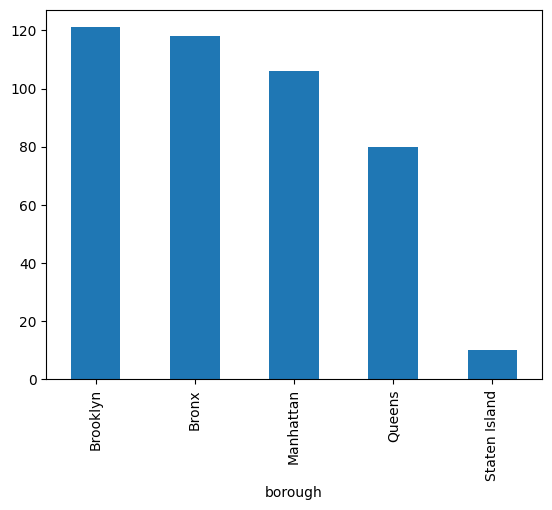

In [78]:
#count unique schools per borough

schools_per_borough = (
    df.groupby("borough")["dbn"] #group records by borough and select school id
      .nunique() #count unique schools per borough
)

#sort boroughs by school count and plot bar chart

schools_per_borough.sort_values(ascending=False).plot.bar()

#### Avg Students per Borough

<Axes: xlabel='borough'>

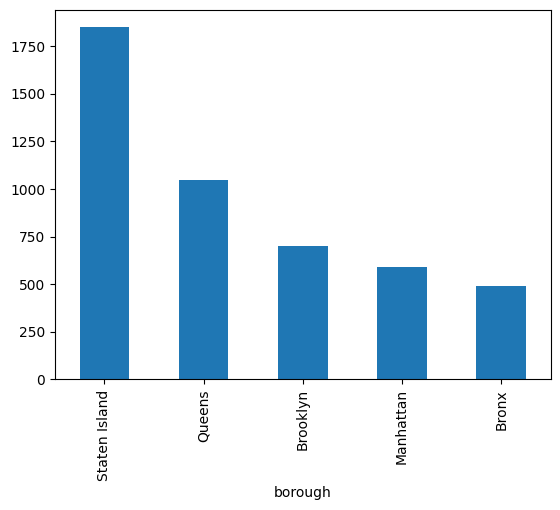

In [79]:
#calculate average number of students per school by borough

avg_students_per_borough = (
    df.groupby(["borough", "dbn"])["total_students"] #group by borough and unique school id
      .mean() #compute mean students per school
      .groupby("borough") #regroup school-level results by borough
      .mean() #compute average school size per borough
)

#sort boroughs by average school size and plot bar chart

avg_students_per_borough.sort_values(ascending=False).plot.bar()

---
## Summary

### **Key Finding 1: Uneven distribution of high schools across boroughs**

Out of **435 high schools**, **Brooklyn (121 schools)** and the **Bronx (118 schools)** host the **largest numbers**.  
**Manhattan** follows with **106 schools**, **Queens** with **80 schools**, while **Staten Island** is **strongly underrepresented** with only **10 schools**.  
This shows a **clear concentration of high schools in Brooklyn and the Bronx**.

### **Key Finding 2: Significant differences in average school size**

Average total student enrollment **differs markedly by borough**.  
Schools in **Staten Island** are the **largest on average** with approximately **1,850 students per school**, despite the **low number of institutions**.  
**Queens** follows with an average of about **1,047 students**, while **Brooklyn** schools average roughly **699 students**.  
**Manhattan (~590 students)** and especially the **Bronx (~490 students)** have **considerably smaller schools on average**.